In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image



%config InlineBackend.figure_format = 'retina'

In [2]:
import torch
from second.test_kitti import depth_to_3D, init_depth_from_feature
from second.protos import pipeline_pb2
from google.protobuf import text_format

from second.pytorch.builder import (box_coder_builder, input_reader_builder,
                                    lr_scheduler_builder, optimizer_builder,
                                    second_builder)
from second.pytorch.train import build_network


from second.sphere.visual import *
from second.sphere.transform import *

In [3]:
#config
config_path="configs/car.fhd.config"
config = pipeline_pb2.TrainEvalPipelineConfig()
with open(config_path, "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, config)
input_cfg = config.train_input_reader
eval_input_cfg = config.eval_input_reader
model_cfg = config.model.second
train_cfg = config.train_config

In [4]:
# build all objects
device="cuda"
net = build_network(model_cfg, False).to(device)
target_assigner = net.target_assigner
voxel_generator = net.voxel_generator

dataset = input_reader_builder.build(
    input_cfg,
    model_cfg,
    training=True,
    voxel_generator=voxel_generator,
    target_assigner=target_assigner,
    multi_gpu=False)

feautres size [1, 64, 64]
res = (1, 64, 64, 1, 2, 7)
feautres size [1, 64, 64]
res = (1, 64, 64, 1, 2, 7)
remain number of infos: 3712


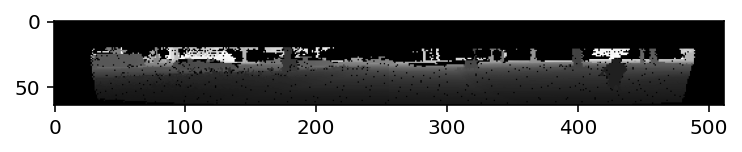

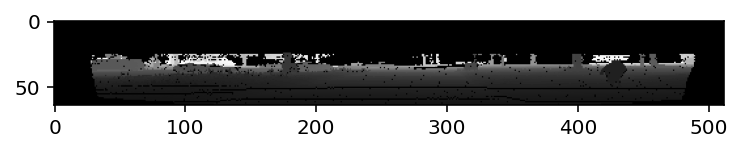

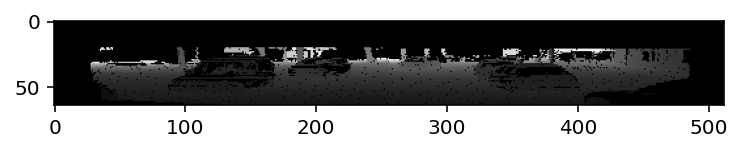

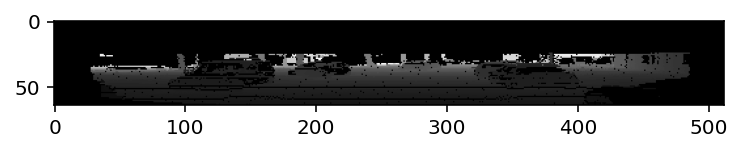

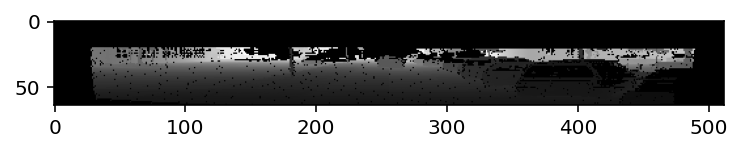

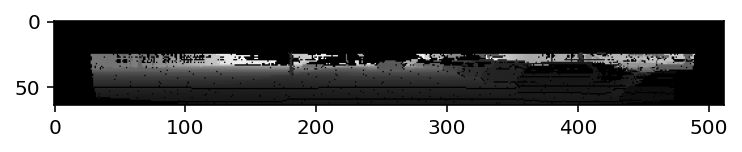

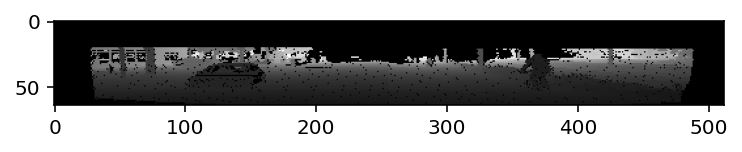

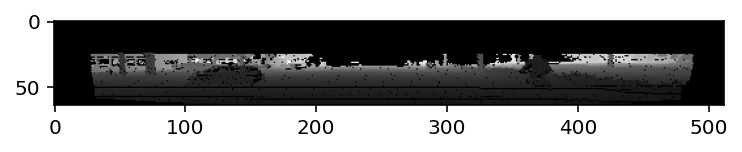

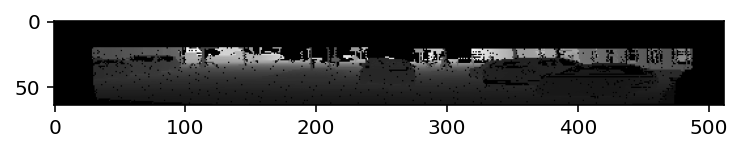

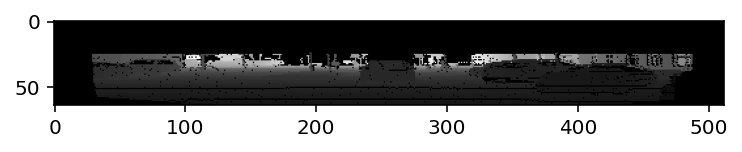

In [6]:
# compare two method of xyz2range
for i in range(0,len(dataset)):
        # break
    if i == 5:
        break
    item = dataset.dataset.get_sensor_data(i+242)
        # print(input_dict)
    points = item['lidar']['points']        
    # imageio.imwrite(fig_path + 'range_map_{:d}.jpg'.format(i),
    # range_map.astype(np.uint8))

    range_map = xyz2range_v2(points)
    depth = depth_from_feature_np(range_map, 255)
    plt.imshow(depth, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
    
    range_map = xyz2range(points)
    depth = depth_from_feature_np(range_map, 255)
    plt.imshow(depth, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
    

In [7]:
from second.data.preprocess import merge_second_batch, merge_second_batch_multigpu
from second.pytorch.train import _worker_init_fn
num_gpu=1
collate_fn= merge_second_batch
multi_gpu = False
dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=input_cfg.batch_size * num_gpu,
        shuffle=True,
#         num_workers=input_cfg.preprocess.num_workers * num_gpu,
        num_workers=1,
        pin_memory=False,
        collate_fn=collate_fn,
        worker_init_fn=_worker_init_fn,
        drop_last=not multi_gpu)

WORKER 0 seed: 1588649935


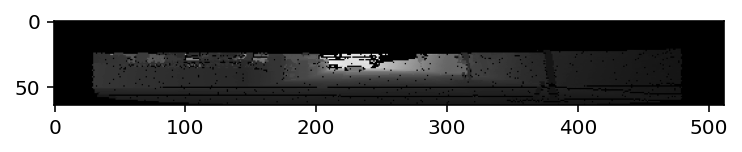

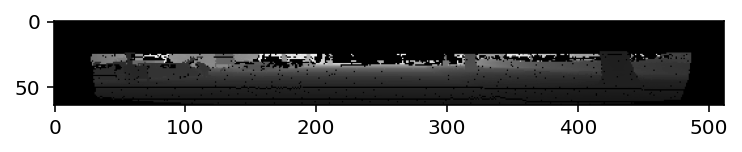

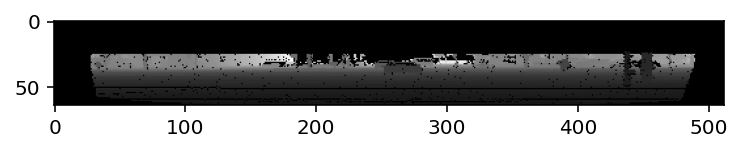

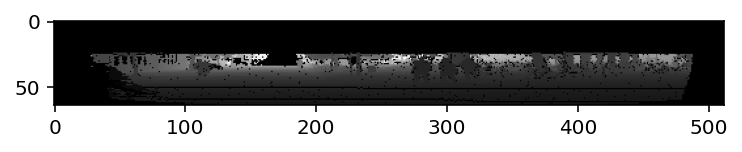

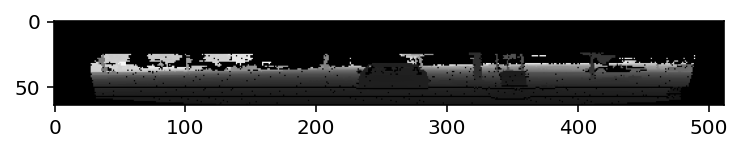

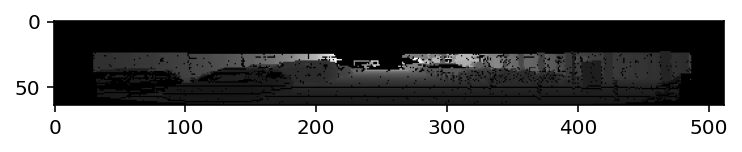

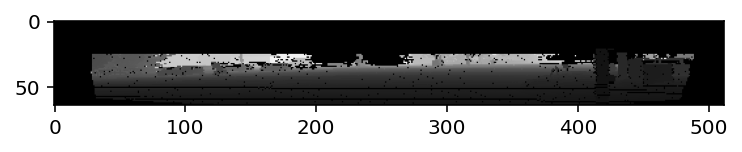

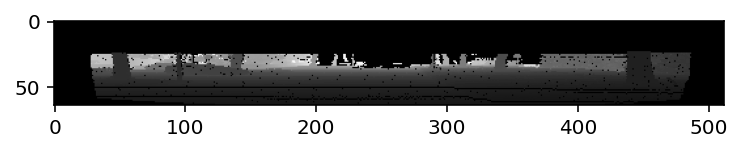

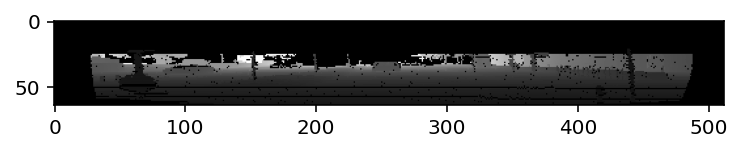

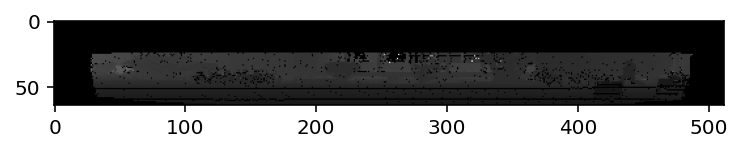

In [8]:
import warnings; warnings.simplefilter('ignore')

examples = []
loop_i = 0
for example in dataloader:
    loop_i += 1
    if loop_i > 10:
        break
    examples.append(example)
#     print(example)
    feature = example['feature']
    depth = depth_from_feature_np(feature[0], 255)
    plt.imshow(depth, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [ ]:
depths = []
for ex in examples:
    feature_np = ex["feature"]
    feature = torch.tensor(feature_np)
    depth = init_depth_from_feature(feature, 128)
    depths.append(depth)

In [ ]:
x

In [ ]:
ap='gray', vmin=0, vmax=255)
    plt.show()
    

In [ ]:
plot_depth(depths[0][0])

In [ ]:
for d in depths:
    plot_depth(d[2])

In [ ]:
import torch.nn.functional as F
for d in depths:
    d_ = d
    d_small = F.max_pool2d(d_.float(), 3, padding=1, stride=(1,2)).long()
    plot_depth(d_small[2])

In [ ]:
import torch.nn.functional as F
for d in depths:
    d_ = d
    d_small = F.max_pool2d(d_.float(), 3, padding=1, stride=(1,2)).long()
    d_small_2 = F.max_pool2d(d_small.float(), 3, padding=1, stride=(1,2)).long()
    
    plot_depth(d_small_2[2]//2)